In [253]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [254]:
#read the train.csv file using pandas
train = pd.read_csv('https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/train.csv')

#backup a copy of the original train.csv
train_original = train.copy()

In [255]:
#read the test.csv file using pandas
test = pd.read_csv('https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/test.csv')

#backup a copy of the original test.csv
test_original = test.copy()

In [256]:
#combine train.csv and test.csv files
combine = pd.concat([train, test], ignore_index=True, sort=True)

In [257]:
#overview the head
combine.head()

,id,label,tweet
0,1,0.0,@user when a father is dysfunctional and is s...
1,2,0.0,@user @user thanks for #lyft credit i can't us...
2,3,0.0,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation


In [258]:
#overview the tail
combine.tail()

,id,label,tweet
49154,49155,NaN,thought factory: left-right polarisation! #tru...
49155,49156,NaN,feeling like a mermaid ð #hairflip #neverre...
49156,49157,NaN,#hillary #campaigned today in #ohio((omg)) &am...
49157,49158,NaN,"happy, at work conference: right mindset leads..."
49158,49159,NaN,"my song ""so glad"" free download! #shoegaze ..."


In [259]:

def remove_pattern(text,pattern):
    
    # re.findall() finds the pattern i.e @user and puts it in a list for further task
    r = re.findall(pattern,text)
    
    # re.sub() removes @user from the sentences in the dataset
    for i in r:
        text = re.sub(i,"",text)
    
    return text

In [260]:
combine['Clean_Tweets'] = np.vectorize(remove_pattern)(combine['tweet'], "@[\w]*")

combine.head()

,id,label,tweet,Clean_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


In [261]:
combine['Clean_Tweets'] = combine['Clean_Tweets'].str.replace('thi', '')

In [262]:
#removing punctuation, numbers, and special characters
combine['Clean_Tweets'] = combine['Clean_Tweets'].str.replace("[^a-zA-Z#]", " ", regex = True)

combine.head(10)

,id,label,tweet,Clean_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...,huge fan fare and big talking before the...
6,7,0.0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny
7,8,0.0,the next school year is the year for exams.ð...,the next school year is the year for exams ...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,we won love the land #allin #cavs #champ...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcome here i m it s so #gr


In [263]:
#removing short words
combine['Clean_Tweets'] = combine['Clean_Tweets'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

combine.head(10)

,id,label,tweet,Clean_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...,huge fare talking before they leave chaos disp...
6,7,0.0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny
7,8,0.0,the next school year is the year for exams.ð...,next school year year exams about that #school...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,love land #allin #cavs #champions #cleveland #...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcome here


In [264]:
#tokens are individual terms or words
#tokenization is the process of splitting a string of text into tokens
tokenized_tweet = combine['Clean_Tweets'].apply(lambda x: x.split())

tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: Clean_Tweets, dtype: object

In [265]:
#stemming strips suffixes like ing, ly, es, s, etc
from nltk import PorterStemmer

ps = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [ps.stem(i) for i in x])

tokenized_tweet.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
Name: Clean_Tweets, dtype: object

In [266]:
#stitch the tokens back together with a for statement
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
    
combine['Clean_Tweets'] = tokenized_tweet
combine.head()

,id,label,tweet,Clean_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus they offer wheelchair ...
2,3,0.0,bihday your majesty,bihday your majesti
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguid societi #motiv


In [267]:
combine['Clean_Tweets'] = combine['Clean_Tweets'].str.replace('happi', 'happy')

In [268]:
#generating a WordCloud
!pip install wordcloud
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import urllib
import requests

In [269]:
#generating wordcloud for tweets with label 0
#storing all words which are non-racist/sexist
all_words_positive = ' '.join(text for text in combine['Clean_Tweets'][combine['label']==0])

In [270]:
#combining the image with the dataset
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

#Use ImageColorGenerator library from Wordcloud
#take the color of the image and impose it over our wordcloud
image_colors = ImageColorGenerator(Mask)

#use the WordCloud funcrion from the wordcloud library
wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(all_words_positive)

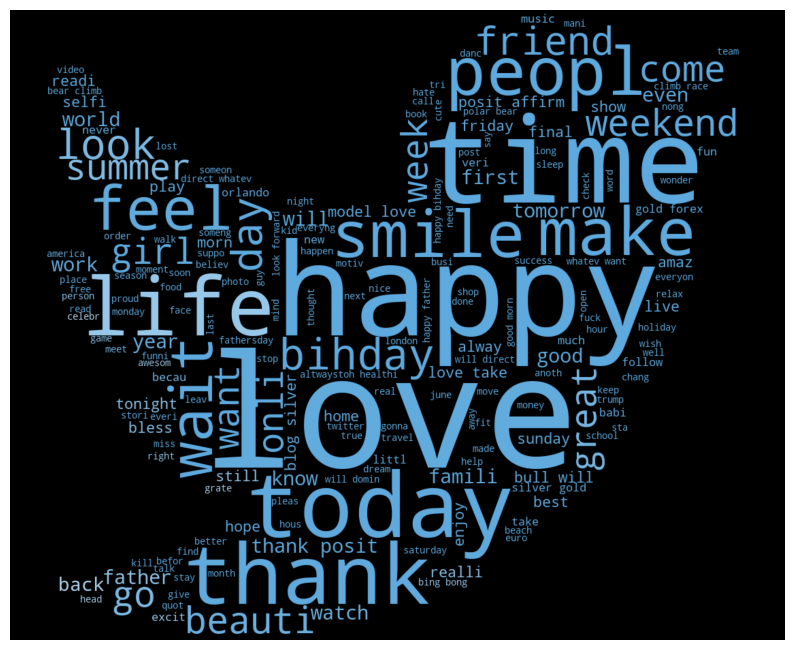

In [271]:
#size of the image generated
plt.figure(figsize=(10,20))

#color the words from the dataset to the image's color
#recolor just recolors the default colors to the image's blue color
#interpolation is used to smooth the image generated
plt.imshow(wc.recolor(color_func=image_colors),interpolation="hamming")

plt.axis('off')
plt.show()

In [272]:
#storing all other words with the label 1
all_words_negative = ' '.join(text for text in combine['Clean_Tweets'][combine['label']==1])


In [273]:
#combining the image with the dataset
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

#use the ImageColorGenerator library from Wordcloud 
#take the color of the image and impose it over our wordcloud
image_colors = ImageColorGenerator(Mask)

#use the WordCloud function from the wordcloud library 
wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(all_words_negative)

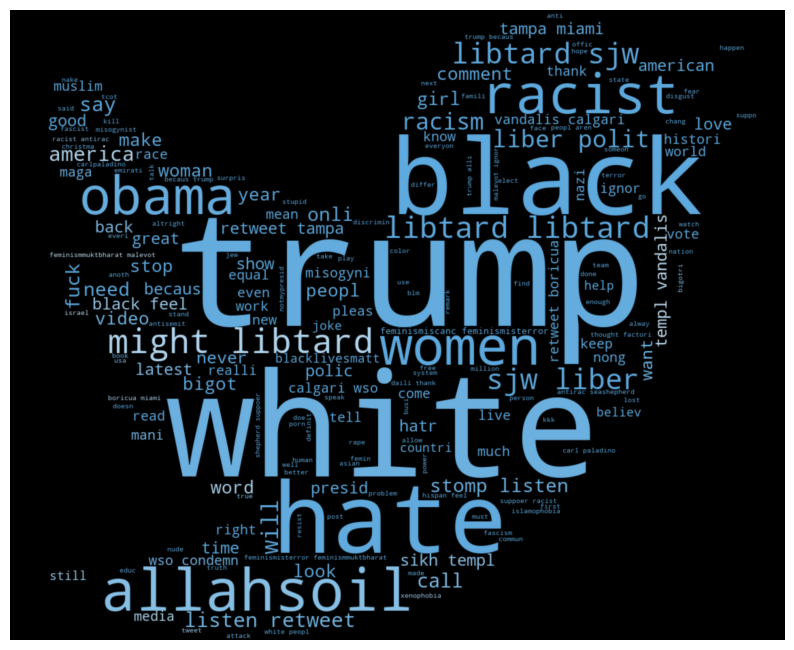

In [274]:
# Size of the image generated 
plt.figure(figsize=(10,20))

# Here we recolor the words from the dataset to the image's color
# recolor just recolors the default colors to the image's blue color
# interpolation is used to smooth the image generated 
plt.imshow(wc.recolor(color_func=image_colors),interpolation="gaussian")

plt.axis('off')
plt.show()

In [275]:
#cleaning up some words for the plot
combine['Clean_Tweets'] = combine['Clean_Tweets'].str.replace('posit', 'positive')

combine['Clean_Tweets'] = combine['Clean_Tweets'].str.replace('polit', 'politics')

In [287]:
combine['Clean_Tweets'] = combine['Clean_Tweets'].str.replace('healthi', 'healthy')

In [288]:
#for-loop extracting hashtags from tweets
def Hashtags_Extract(x):
    hashtags=[]
    for i in x:
        ht = re.findall(r'#(\w+)',i)
        hashtags.append(ht)
        
    return hashtags

In [289]:
ht_positive = Hashtags_Extract(combine['Clean_Tweets'][combine['label']==0])

In [290]:
#unnest the list
ht_positive_unnest = sum(ht_positive,[])

In [291]:
ht_negative = Hashtags_Extract(combine['Clean_Tweets'][combine['label']==1])

In [292]:
#unnest the list
ht_negative_unnest = sum(ht_negative,[])

In [293]:
#plotting the positive hashtags
#counting the frequency of words that are positive

word_freq_positive = nltk.FreqDist(ht_positive_unnest)

word_freq_positive

FreqDist({'love': 1654, 'positive': 917, 'smile': 676, 'healthy': 576, 'thank': 534, 'fun': 463, 'life': 425, 'affirm': 423, 'summer': 390, 'model': 375, ...})

In [294]:
#creating a df for the most frequently used words in hashtags
df_positive = pd.DataFrame({'Hashtags':list(word_freq_positive.keys()),'Count':list(word_freq_positive.values())})

df_positive.head()

,Hashtags,Count
0,run,72
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,375


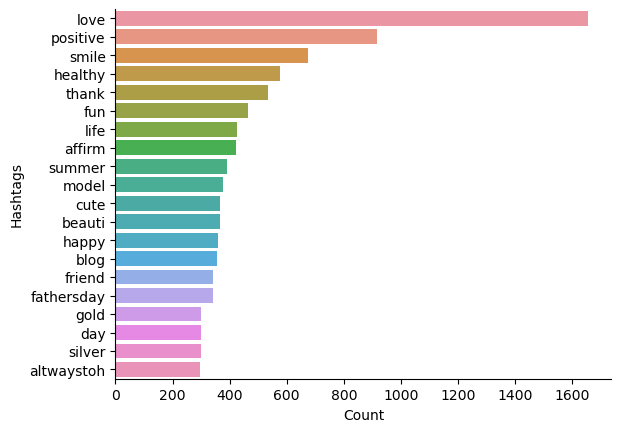

In [295]:
#plotting a bar plot for the 20 most frequent words used for hashtags

df_positive_plot = df_positive.nlargest(20,columns='Count')

sns.barplot(data=df_positive_plot,y='Hashtags',x='Count')
sns.despine()

In [296]:
#frequency for negative sentiments
word_freq_negative = nltk.FreqDist(ht_negative_unnest)

word_freq_negative

FreqDist({'trump': 136, 'politics': 95, 'allahsoil': 92, 'liber': 81, 'libtard': 77, 'sjw': 75, 'retweet': 63, 'black': 46, 'miami': 46, 'hate': 37, ...})

In [297]:
#dataframe for the most frequently used words in hashtags

df_negative = pd.DataFrame({'Hashtags':list(word_freq_negative.keys()),'Count':list(word_freq_negative.values())})

df_negative.head(10)

,Hashtags,Count
0,cnn,10
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,5
5,seashepherd,22
6,helpcovedolphin,3
7,thecov,4
8,neverump,8
9,xenophobia,12


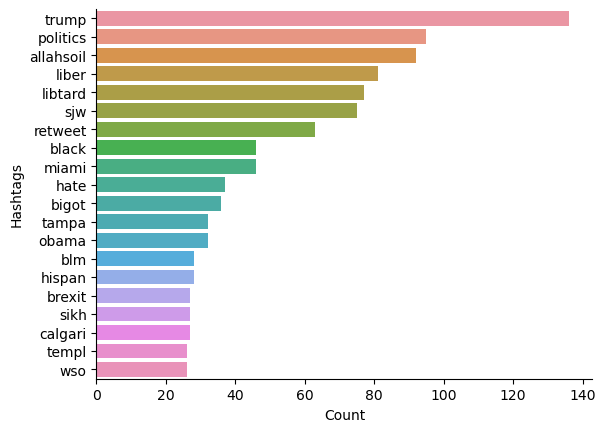

In [298]:
#plotting a barplot for the 20 most frequent words used for hashtags
df_negative_plot = df_negative.nlargest(20,columns='Count') 

sns.barplot(data=df_negative_plot,y='Hashtags',x='Count')
sns.despine()